In [56]:
import cv2 as cv
import numpy as np
import sys
from PIL import Image, ImageChops
import matplotlib.pyplot as plt

In [57]:
def trim(im):
    bg = Image.new(im.mode, im.size, im.getpixel((0,0)))
    diff = ImageChops.difference(im, bg)
    diff = ImageChops.add(diff, diff, 2.0, -100)
    bbox = diff.getbbox()
    if bbox:
        return im.crop(bbox)


In [58]:
path = '/home/spriyanshu723/biomedical/Mask_classification/'
!ls {path}

000001_0_1462.jpg  000041_0_7174.jpg  000082_0_4211.jpg  000123_0_2773.jpg
000001_0_1565.jpg  000041_0_7563.jpg  000082_0_4549.jpg  000123_0_2862.jpg
000001_0_1646.jpg  000041_0_7818.jpg  000082_0_4665.jpg  000123_0_2945.jpg
000001_0_1651.jpg  000041_0_8147.jpg  000082_0_4909.jpg  000123_0_3239.jpg
000001_0_1881.jpg  000041_0_8744.jpg  000082_0_5646.jpg  000123_0_3448.jpg
000001_0_2015.jpg  000041_0_8880.jpg  000082_0_5786.jpg  000123_0_3462.jpg
000001_0_2065.jpg  000041_0_9165.jpg  000082_0_6238.jpg  000123_0_3678.jpg
000001_0_263.jpg   000041_0_9224.jpg  000082_0_6378.jpg  000123_0_3725.jpg
000001_0_266.jpg   000041_0_9386.jpg  000082_0_6721.jpg  000123_0_3834.jpg
000001_0_2718.jpg  000041_0_9450.jpg  000082_0_6854.jpg  000123_0_4122.jpg
000001_0_2773.jpg  000042_0_1462.jpg  000082_0_7174.jpg  000123_0_4211.jpg
000001_0_2862.jpg  000042_0_1565.jpg  000082_0_7563.jpg  000123_0_4549.jpg
000001_0_2945.jpg  000042_0_1646.jpg  000082_0_7818.jpg  000123_0_4665.jpg
000001_0_3239.jpg  000042

In [61]:
import os
for images in os.listdir(path):
    img = cv.imread(path+images)
    img_trim=trim(Image.fromarray(img))
    img_trim.save('/home/spriyanshu723/biomedical/crop/'+images[:-3]+'png')

In [62]:
path = '/home/spriyanshu723/biomedical/crop/'
!ls {path}

000001_0_1462.png  000041_0_7174.png  000082_0_4211.png  000123_0_2773.png
000001_0_1565.png  000041_0_7563.png  000082_0_4549.png  000123_0_2862.png
000001_0_1646.png  000041_0_7818.png  000082_0_4665.png  000123_0_2945.png
000001_0_1651.png  000041_0_8147.png  000082_0_4909.png  000123_0_3239.png
000001_0_1881.png  000041_0_8744.png  000082_0_5646.png  000123_0_3448.png
000001_0_2015.png  000041_0_8880.png  000082_0_5786.png  000123_0_3462.png
000001_0_2065.png  000041_0_9165.png  000082_0_6238.png  000123_0_3678.png
000001_0_263.png   000041_0_9224.png  000082_0_6378.png  000123_0_3725.png
000001_0_266.png   000041_0_9386.png  000082_0_6721.png  000123_0_3834.png
000001_0_2718.png  000041_0_9450.png  000082_0_6854.png  000123_0_4122.png
000001_0_2773.png  000042_0_1462.png  000082_0_7174.png  000123_0_4211.png
000001_0_2862.png  000042_0_1565.png  000082_0_7563.png  000123_0_4549.png
000001_0_2945.png  000042_0_1646.png  000082_0_7818.png  000123_0_4665.png
000001_0_3239.png  000042

In [63]:
len(os.listdir(path))

6520

In [65]:
list_size_h=[]
list_size_w=[]
for images in os.listdir(path):
    img=cv.imread(path+images)
    list_size_h.append(img.shape[0])
    list_size_w.append(img.shape[1])

In [66]:
max(list_size_h)

364

In [67]:
max(list_size_w)

446

In [68]:
h = 400
h

400

In [69]:
w = 500
w

500

In [71]:
path

'/home/spriyanshu723/biomedical/crop/'

In [72]:
import numpy as np
for images in os.listdir(path):
    img=cv.imread(path+images)
    h_pad=h-img.shape[0]
    w_pad=w-img.shape[1]
    (y1,y2)=(h_pad/2,h_pad/2) if h_pad%2==0 else (h_pad//2,h_pad//2+1)
    (x1,x2)=(w_pad/2,w_pad/2) if w_pad%2==0 else (w_pad//2,w_pad//2+1)
    i = np.pad(img,((int(y1),int(y2)),(int(x1),int(x2)),(0,0)),'constant',constant_values=img[0][0][0])
    plt.imsave('/home/spriyanshu723/biomedical/crop_padded/'+images,i)

In [73]:
path = '/home/spriyanshu723/biomedical/crop_padded/'

In [74]:
list_size_h=[]
list_size_w=[]
for images in os.listdir(path):
    img=cv.imread(path+images)
    list_size_h.append(img.shape[0])
    list_size_w.append(img.shape[1])

In [75]:
max(list_size_h)

400

In [76]:
max(list_size_w)

500

In [6]:
img = cv.imread('000145_0_9450.jpg')

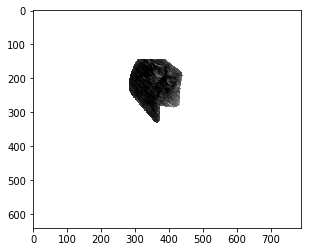

In [7]:
plt.imshow(img)

In [9]:
img_trim=trim(Image.fromarray(img))

189

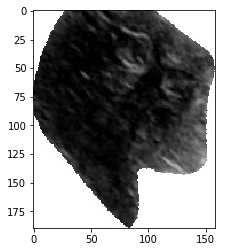

In [39]:
plt.imshow(img_trim)
len(np.unique(np.array(img_trim)))

In [32]:
img_trim.save('sample_crop.jpg')

In [53]:
img=cv.imread('sample_crop_cv.png')

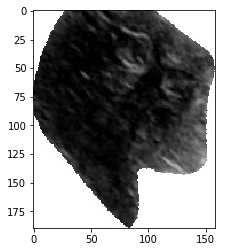

In [54]:
plt.imshow(img)

In [55]:
len(np.unique(img))

189

In [50]:
cv.imwrite('sample_crop_cv.png',np.array(img_trim))

True

In [49]:
np.count_nonzero((img-np.array(img_trim))==0)

47304

In [47]:
img.shape

(190, 159, 3)